<a href="https://colab.research.google.com/github/mrv7777/MLP/blob/main/MLP_WEEK3_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.2.2
import sklearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [2]:
sklearn.__version__

'1.2.2'

In [6]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('DataPreprocessingGraded_dataset.csv')

In [7]:
data.shape

(748, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [11]:
print(data['V1'].unique())
print(data['V2'].unique())
print(data['V3'].unique())
print(data['V4'].unique())
print(data['V5'].unique())
print(data['Target'].unique())

['2.0' '0.0' '?' '1.0' '4.0' '5.0' '9.0' '3.0' '12.0' '6.0' '11.0' '10.0'
 '13.0' '8.0' '14.0' '7.0' '16.0' '15.0' '23.0' '21.0' '18.0' '22.0'
 '26.0' '35.0' '38.0' '40.0' '74.0' '20.0' '17.0' '25.0' '39.0' '72.0']
['50.0' '13.0' '?' '20.0' '24.0' '12.0' '9.0' '46.0' '3.0' '10.0' '6.0'
 '5.0' '14.0' '11.0' '8.0' '16.0' '7.0' '2.0' '19.0' '4.0' '17.0' '1.0'
 '15.0' '22.0' '18.0' '38.0' '43.0' '34.0' '44.0' '26.0' '41.0' '21.0'
 '33.0']
[12500.  3250.  4000.  5000.  6000.  1000.  1750.  3000.  2250. 11500.
  5750.   750.  2500.  1500.  1250.  3500.  3750.  2750.  2000.   500.
  4750.  4250.   250.  5500.  4500.  9500. 10750.  8500. 11000.  6500.
 10250.  5250.  8250.]
[98. 28. 35. 45. 77.  4. 14. 22. 58. 47. 15. 11. 48. 49. 16. 40. 34. 21.
 26. 64. 57. 53. 69. 36.  2. 46. 52. 81. 29.  9. 74. 25. 51. 71. 23. 86.
 38. 76. 70. 59. 82. 61. 79. 41. 33. 10. 95. 88. 19. 37. 39. 78. 42. 27.
 24. 63. 43. 75. 73. 50. 60. 17. 72. 62. 30. 31. 65. 89. 87. 93. 83. 32.
 12. 18. 55.  3. 13. 54.]
['NEGAT

In [12]:
data.replace('?', np.nan, inplace=True)

In [13]:
data

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE,NO
744,21.0,2.0,500.0,52.0,NEGATIVE,NO
745,23.0,3.0,750.0,62.0,NEGATIVE,NO
746,39.0,1.0,250.0,39.0,NEGATIVE,NO


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    object 
 1   V2      743 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


**1- How many features remain after applying following pipeline to the feature matrix?**

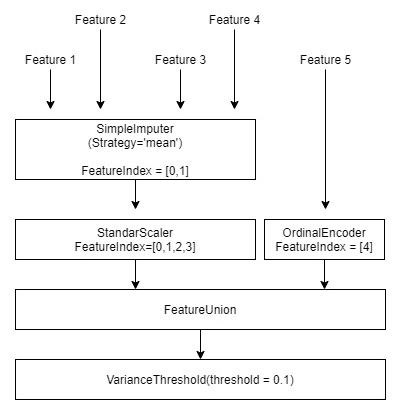

In [57]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OrdinalEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector',ColumnTransformer([('select_first_4',
                                                         'passthrough',
                                                         slice(0,4))])),
                         ('imputer', SimpleImputer(strategy="mean")),
                         ('std_scaler', StandardScaler()),
                        ])
cat_pipeline = ColumnTransformer([('ordinal_encoder', OrdinalEncoder(),[4]),
                                  ])
full_pipeline = FeatureUnion(transformer_list=
                             [("num_pipeline", num_pipeline),
                              ("cat_pipeline", cat_pipeline),
                             ])

In [63]:
features = data.drop(['Target'],axis=1)
target = data['Target']

In [64]:
new_data = full_pipeline.fit_transform(features)
new_data = pd.DataFrame(new_data)
new_data.head()

,0,1,2,3,4
0,-0.938169,7.709867e+00,7.623346,2.615633,0.0
1,-1.186278,1.304549e+00,1.282738,-0.257881,0.0
2,0.000000,-1.537585e-16,1.796842,0.029471,0.0
3,0.000000,2.516366e+00,2.482313,0.439973,0.0
4,-1.062223,3.208833e+00,3.167784,1.753579,0.0


In [65]:
new_data.shape

(748, 5)

In [60]:
np.var(np.array(new_data),axis=0)

array([1., 1., 1., 1., 0.])

In [66]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.1)
new_data = vt.fit_transform(new_data)
new_data.shape

(748, 4)

**2-What are the two most important features computed by RFE?**
**Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.**

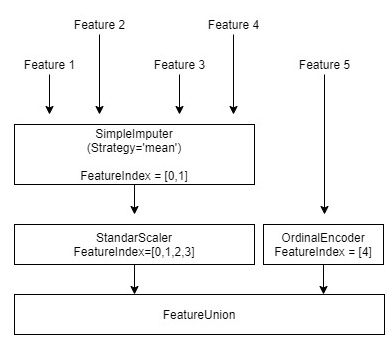

In [69]:
new_features = full_pipeline.fit_transform(features)
pd.DataFrame(new_features).head()


,0,1,2,3,4
0,-0.938169,7.709867e+00,7.623346,2.615633,0.0
1,-1.186278,1.304549e+00,1.282738,-0.257881,0.0
2,0.000000,-1.537585e-16,1.796842,0.029471,0.0
3,0.000000,2.516366e+00,2.482313,0.439973,0.0
4,-1.062223,3.208833e+00,3.167784,1.753579,0.0


In [72]:
eord = OrdinalEncoder()
new_target = eord.fit_transform(np.array(target).reshape(-1,1))
pd.DataFrame(new_target).head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [75]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(new_features, new_target)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [76]:
selector.support_

array([ True, False,  True, False, False])

**3-What are the indices of two most important features computed by SFS (forward)?**

In [77]:
from sklearn.feature_selection import SequentialFeatureSelector

In [78]:
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2, direction='forward')
sfs = sfs.fit(new_features, new_target)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [79]:
sfs.get_support()

array([False,  True, False,  True, False])

**4- What are the indices of two most important features computed by SFS (backward)?**

In [80]:
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2, direction='backward')
sfs = sfs.fit(new_features, new_target)
sfs.get_support()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

array([False, False,  True,  True, False])